# MNIST

In [10]:
import numpy as np
import pandas as pd

from IPython.display import display

# models/classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# tools for pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# tools for classifier evaluation
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score

# tools for hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

# tools for plotting
import matplotlib.pyplot as plt

# for nan values checking
import math

## Global config

In [11]:

models = {
    "GaussianNB" : GaussianNB(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=42),
    "SVC" : SVC(C=10, kernel="poly", random_state=42),
    "KNeighbours": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "LogisticRegression": LogisticRegression(penalty="none", random_state=42)
}

tuned_models = {
            "GaussianNB": GaussianNB(),
            "DecisionTreeClassifier" : DecisionTreeClassifier(),
            "SVC" : SVC(),
            "KNeighbours": KNeighborsClassifier(),
            "LogisticRegression": LogisticRegression()
}

hyper_params = {
    "DecisionTreeClassifier" : ["max_depth", "min_samples_leaf"],
    "SVC" : ["C", "kernel"],
    "KNeighbours": ["weights", "n_neighbors"],
    "LogisticRegression": ["C", "penalty"]
}

normal_scores_8x8 = np.arange(5)
tuned_scores_8x8 = np.arange(5)


## Load data

In [ ]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Dimitar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "C:\Users\Dimitar\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Dimitar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2996, in run_cell_async
    self.history_manager.store_inputs(self.execution_count,
  File "C:\Users\Dimitar\anaconda3\lib\site-packages\IPython\core\history.py", line 719, in store_inputs
    with self.db_input_cache_lock:
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Dimitar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling o

## Helpers

In [12]:
def plot_results(scores, bar_1, bar_2):
    
    scores_1 = scores[0]
    scores_2 = None
    
    if len(scores) == 2:
        scores_2 = scores[1]
   
    
    labels = ['NB', 'Tree', 'SVC', 'K-NN', 'LR']
        
    x = np.arange(len(labels))
    
    fig, ax = plt.subplots()
    
    width = 0.35
    rects1 = ax.bar(x - width/2, scores_1, width, label=bar_1)
    rects2 = ax.bar(x + width/2, scores_2, width, label=bar_2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Scores by algorithm and dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()
    
def setModelParams(target, source):
    for name, value in source.get_params().items():
        target.get_params()[name] = value
        

setModelParams(LogisticRegression(), LogisticRegression())

##  Data exploration

### Question 1
Hint: `plt.imshow`

,Dataset,Size,Features
0,mnist_8x8,3750,64
1,mnist_28x28,3750,784


,Digit,Frequency
0,0.0,395.0
1,1.0,376.0
2,2.0,367.0
3,3.0,378.0
4,4.0,388.0
5,5.0,366.0
6,6.0,371.0
7,7.0,366.0
8,8.0,366.0
9,9.0,377.0



Picture number 0 in the train sets is of class:  1


'\nFirst images from the datasets are 1s. We can see the two images differ\nin the amount of information they provide because of the difference in dimensionality.\n\nThe digits in the dataset are not uniformly distributed, because 0 is predominant, \nwhile 5 and 7 are least frequent.\n\nBecause the data in the second dataset contains more correlation and more redundant information\nthe resulting presumption is that the smaller dataset will on average perform better.\n\n'

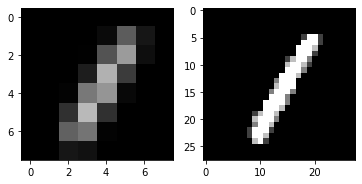

In [13]:
dataset_sizes = pd.DataFrame([
    ["mnist_8x8", mnist_8x8_train.shape[0], mnist_8x8_train.shape[1] * mnist_8x8_train.shape[2]],
    ["mnist_28x28", mnist_28x28_train.shape[0], mnist_28x28_train.shape[1] * mnist_28x28_train.shape[2]]],
    columns = ["Dataset", "Size", "Features"]
)

display(dataset_sizes)

digit_count = np.zeros(20)

for label in train_labels:
    digit_count[label] += 1
    
digit_count = digit_count

info = np.zeros(20).reshape(10, 2)

for i in range(10):
    info[i] = [i, digit_count[i]]
    
digits_frequency = pd.DataFrame(info, columns=["Digit", "Frequency"])

display(digits_frequency)

print()

i = 0
print("Picture number {} in the train sets is of class: ".format(i), train_labels[i])

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mnist_8x8_train[i], cmap='gray', vmin=0, vmax=255)
axarr[1].imshow(mnist_28x28_train[i], cmap='gray', vmin=0, vmax=255)

"""
First images from the datasets are 1s. We can see the two images differ
in the amount of information they provide because of the difference in dimensionality.

The digits in the dataset are not uniformly distributed, because 0 is predominant, 
while 5 and 7 are least frequent.

Because the data in the second dataset contains more correlation and more redundant information
the resulting presumption is that the smaller dataset will on average perform better.

"""

##  Data Preparations

### Question 1

In [14]:
# Data Pre-processing
"""
Because we want every sample to be a feature vector in order to work with the
classifiers, we will reshape the data in both datasets.

No data cleaning is needed, because the dataset does not contain missing or null values.
However, there is lots of redundant data and to get rid of it, we will perform PCA
dimensionlaty reduction. In this way, we also significantly decrease the training time
of algorithms like SVM and Decision Tree. 

The data has feature scaling and so there is little need to normalize the data for 
K-Nearest Neighbours, Logistic Regression or SVM. 

"""

# Reshape the data
mnist_28 = mnist_28x28_train.reshape(mnist_28x28_train.shape[0], 28 * 28)
mnist_8 = mnist_8x8_train.reshape(mnist_8x8_train.shape[0], 8 * 8)

# Dimensionality Reduction with PCA
pca_8 = PCA(0.95)
pca_28 = PCA(0.95)

# Reduce 8x8
mnist_8_reduced = pca_8.fit_transform(mnist_8)

# Reduce 28x28
mnist_28_reduced =  pca_28.fit_transform(mnist_28)

dict = {
    "Dataset": ["28x28", "28x28 PCA reduced", "8x8", "8x8 reduced"],
    "Components": [28*28, mnist_28_reduced.shape[1], 8*8, mnist_8_reduced.shape[1]],
    "Variance %": [100, pca_28.n_components * 100, 100, pca_8.n_components * 100]
}
comp = pd.DataFrame(dict)
display(comp)


,Dataset,Components,Variance %
0,28x28,784,100.0
1,28x28 PCA reduced,148,95.0
2,8x8,64,100.0
3,8x8 reduced,22,95.0


### Question 1

In [15]:
## Experiments
"""
We will divide the train set into two, leaving 30% of the data as out validation set. We
will also use a standard 5-fold cross-validation to get an average estimate of our classifiers'
performance. In this way, we also ensure that the whole dataset will be used for testing, leading
to more correct classifier evaluation.

However, we will not do it now because sklearn already provides a method for performing
cross-validation on a given dataset and labels.

"""

"\nWe will divide the train set into two, leaving 30% of the data as out validation set. We\nwill also use a standard 5-fold cross-validation to get an average estimate of our classifiers'\nperformance. In this way, we also ensure that the whole dataset will be used for testing, leading\nto more correct classifier evaluation.\n\nHowever, we will not do it now because sklearn already provides a method for performing\ncross-validation on a given dataset and labels.\n\n"

### Question 2

GaussianNB : 8x8:  0.8479999999999999, 28x28:  0.8397333333333334
DecisionTreeClassifier : 8x8:  0.748, 28x28:  0.7128
SVC : 8x8:  0.9389333333333333, 28x28:  0.9551999999999999
KNeighbours : 8x8:  0.9256, 28x28:  0.9293333333333333
LogisticRegression : 

C:\Users\Dimitar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

8x8:  0.8797333333333335, 28x28:  0.8170666666666666


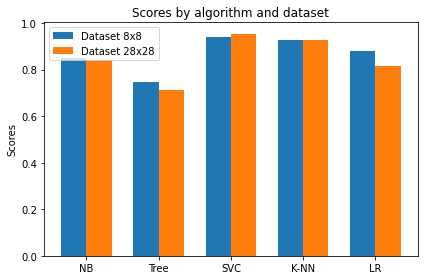

'\nThe bar plot below shows the average accuracy of the five algorithms cross-validated\nusing 90% train data and 10% validation data.\nAs we can see, the performance is from worse to best:\nDecision Tree < Naive Bayes < Logistic Regression < K-Nearest Neighbours < SVC\n\nThe plot also shows that on average:\n    SVC and K-NN perform better with the larger dataset\n    GaussianNB, Decision Tree and Logistic Regression perform better with the compressed dataset. \n\nExplanation of results is as follows:\n1) Decision tree does not perform well because classes are not uniformly distributed.\n2) The Naive Bayes also does not perform well as its assumtion of feature independence is incorrect.\n3) Even after PCA, there is noise in the data, leading to lack of good convergence\n    for gradient ascent of Logistic Regression.\n\n4) K-NN and SVC usually perform well with large datasets and weighted K-NN considers the distances to \n    neighbours as well, making it less affected by the non-unif

In [16]:
# Now we will fit the models using

scores_8x8 = np.zeros(5) 
scores_28x28 = np.zeros(5)

index = 0

for name, model in models.items():
    print("{n} : ".format(n=name), end='')
   
    scores_8x8[index] = np.mean(cross_validate(model, mnist_8_reduced, train_labels, cv=10)['test_score'])
    scores_28x28[index] = np.mean(cross_validate(model, mnist_28_reduced, train_labels, cv=10)['test_score'])
    
    print("8x8: ", scores_8x8[index], end=', ')
    print("28x28: ", scores_28x28[index])
    
    index += 1

normal_scores_8x8 = scores_8x8    
plot_results([scores_8x8, scores_28x28], "Dataset 8x8", "Dataset 28x28")

'''
The bar plot below shows the average accuracy of the five algorithms cross-validated
using 90% train data and 10% validation data.
As we can see, the performance is from worse to best:
Decision Tree < Naive Bayes < Logistic Regression < K-Nearest Neighbours < SVC

The plot also shows that on average:
    SVC and K-NN perform better with the larger dataset
    GaussianNB, Decision Tree and Logistic Regression perform better with the compressed dataset. 

Explanation of results is as follows:
1) Decision tree does not perform well because classes are not uniformly distributed.
2) The Naive Bayes also does not perform well as its assumtion of feature independence is incorrect.
3) Even after PCA, there is noise in the data, leading to lack of good convergence
    for gradient ascent of Logistic Regression.

4) K-NN and SVC usually perform well with large datasets and in this case weighted K-NN considers the distances to 
    neighbours as well, making it less affected by the non-uniform digit distribution.

'''

In [17]:


# Logistic Regression
param_grid_lr = { 
    'C': [0.01, 0.1, 1, 5, 10, 30],
    'penalty': ['none', 'l1', 'l2', 'elasticnet']
    }


# SVC
param_grid_svc = { 
    'C': [96, ],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
    
# Decision Tree
param_grid_dt = {
    'max_depth': [ 10, 12, 14, 15, None],
    'min_samples_leaf': np.linspace(0.000001, 0.00001 , 30, endpoint=True)
}

# K-Nearest Neighbours
param_grid_knn = {
    'n_neighbors': [3, 4, 5, 6, 7, 10, 50, 70, 100],
    'weights': ['uniform', 'distance']
}

tuned_models['LogisticRegression'] = GridSearchCV(LogisticRegression(), param_grid_lr, refit=True, verbose=0)
tuned_models['SVC'] = GridSearchCV(SVC(), param_grid_svc, refit=True, verbose=0)
tuned_models['DecisionTreeClassifier'] = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit=True, verbose=0)
tuned_models['KNeighbours'] = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=0)

In [ ]:

# Hyper-Parameter Tuning

index = -1

# Create a data splitter for the outer CV

for name, model in tuned_models.items():
    
    # Update index of the score to update
    index += 1
    
    # Skip Naive Bayes
    if name == "GaussianNB":
        tuned_scores_8x8[index] = normal_scores_8x8[0]
        continue
    
    best_model = None
    best_score = 0
    best_params = None

    print(name, ":")
    cv_outer = StratifiedKFold(n_splits=6)
    splits = cv_outer.split(mnist_8_reduced, train_labels)


    for i, split in enumerate(splits):

        # Get the splitted training and testing set
        train_i, test_i = split[0], split[1]
        trainX, testX, trainY, testY = (mnist_8_reduced[train_i], mnist_8_reduced[test_i], train_labels[train_i], train_labels[test_i])
            
        # Fit the model -> Get best hyper params in the inner CV
        model.fit(trainX, trainY)
        est = model.best_estimator_
        print(est)
                    
        # Test it using the testing set in the outer CV
        predictions = est.predict(testX)
            
        # Check whether it has the best performnce by now
        score = accuracy_score(testY, predictions)
        if score > best_score:
                    
            best_score = score
            best_model = est
            best_params = model.best_params_
            
            # Update the best params for the model
            
            
        print("Split {i}: ".format(i=i), score)
        
    tuned_models[name] = best_model
    print(tuned_models[name])
    tuned_scores_8x8[index] = best_score
    
    print()


"""
To perform hyper-parameter tuning, we use double cross validation. To do this, we use
a StratifiedKFold object to make 5 splits of our training mnist dataset into training and validation set.
We use a GridSearchCV object to perform the inner cross validation. For every model and every 
split of the data, we fit the split's train data into the GridSearchCV object, which automatically performs the inner
cross validation for every combination of the provided values for the model's hyper-parameters.
The best performing combinations for every split are then compared in the outer CV with the split's validation set.

The best perforing combination in the outer CV is used to tune the model.

We perform this for both the large and the compressed mnist training datasets.

"""

for model in tuned_models:
    print(model)

DecisionTreeClassifier :
DecisionTreeClassifier(max_depth=15, min_samples_leaf=1.6206896551724138e-06)
Split 0:  0.752
DecisionTreeClassifier(max_depth=15, min_samples_leaf=6.5862068965517236e-06)
Split 1:  0.7296
DecisionTreeClassifier(max_depth=14, min_samples_leaf=8.758620689655173e-06)
Split 2:  0.7728


### Question 4 

{'GaussianNB': GaussianNB(), 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=14, min_samples_leaf=9.068965517241379e-06), 'SVC': SVC(C=96), 'KNeighbours': KNeighborsClassifier(n_neighbors=4, weights='distance'), 'LogisticRegression': LogisticRegression(C=0.01)}
GaussianNB
DecisionTreeClassifier
SVC
KNeighbours
LogisticRegression


C:\Users\Dimitar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

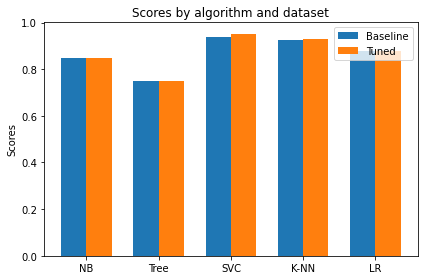

'\nAfter we tuned our models, we will compare their performance with that of the baseline versions by again performing\na 10-fold cross validation. On the plot below we can see the results of testing our algorithms on the smaller PCA-reduced \ndataset with and without hyper-parameter tuning. \n\nClearly only the K-NN and SVC classifiers managed to be improved in the process. For SVC, this \nwas done by just decreasing the regularization parameter, thus reducing the amount of overfitting.\nFor Nearest Neighbours, we again use the weighted k-nn version of the algorithm, but now with a smaller\nnumber of neighbours to use for prediction. \n\nFor the other 2 tuned algorithms - Logistic Regression and Decision Tree, it could be that the method or comparison\nmetric for tuning was not efficient enough, leading to a badly chosen combination of parameters.\n\n'

In [14]:
# Plot the performance of the 8x8 dataset models / tuned_models

perf_normal = normal_scores_8x8
perf_tuned = np.zeros(5)

index = 0

print(tuned_models)

for name, tuned_model in tuned_models.items():
    print(name)
    if name == "GaussianNB":
        perf_tuned[index] = normal_scores_8x8[index]
        index += 1
        continue
    perf_tuned[index] = np.mean(cross_validate(tuned_model, mnist_8_reduced, train_labels, cv=10)['test_score'])
    index += 1                  
                                
plot_results([scores_8x8, perf_tuned], "Baseline", "Tuned")
                                
# Effect of tuning - results and differences
"""
After we tuned our models, we will compare their performance with that of the baseline versions by again performing
a 10-fold cross validation. On the plot below we can see the results of testing our algorithms on the smaller PCA-reduced 
dataset with and without hyper-parameter tuning. 

Clearly only the K-NN and SVC classifiers managed to be improved in the process. For SVC, this 
was done by just decreasing the regularization parameter, thus reducing the amount of overfitting.
For Nearest Neighbours, we again use the weighted k-nn version of the algorithm, but now with a smaller
number of neighbours to use for prediction. 

For the other 2 tuned algorithms - Logistic Regression and Decision Tree, it could be that the method or comparison
metric for tuning was not efficient enough, leading to a badly chosen combination of parameters.

"""


### Question 5

In [1]:
# Comparison of performance with the different number of features

plot_results([scores_8x8, scores_28x28], "Dataset 8x8", "Dataset 28x28")

"""

The results by now showed 3 of the 5 algorithms perform worse with the larger dataset,
which corresponds with the initial assumption.

Presumably, Decision Tree and Logistic Regression are affected by the general curse of dimensionality problem,
while the Naive Bayes is affected by the increase of feature correlation and noise in the data.

SVC and K-NN are not affected by the curse of dimensionality in this case, probably because of 
the large training set size and the right parameters.

"""


NameError: name 'plot_results' is not defined

### Question 6

[7 0 0 5 7 9 0 6 6 5]


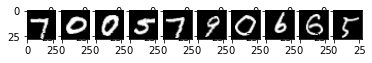

In [40]:
# Pre-process data of the test 28x28 set
mnist_8x8_test_reshaped = mnist_8x8_test.reshape(mnist_8x8_test.shape[0], 64)

test_dataset = pca_8.transform(mnist_8x8_test_reshaped)

best_algorithm = SVC(C=10)


best_algorithm.fit(mnist_8_reduced, train_labels)

prediction = best_algorithm.predict(test_dataset)

print(prediction[1240:1250])

f, axarr = plt.subplots(1,10)
for i in range(10):
    axarr[i].imshow(mnist_28x28_test[1240+i], cmap='gray', vmin=0, vmax=255)

    
    
# pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)